### Project 1 - Shopping Trends

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
shootings_df = pd.read_csv("/kaggle/input/school-shootings/school-shootings-data.csv")

In [6]:
print(shootings_df)

     uid nces_school_id                             school_name  \
0      1   080480000707                   Columbine High School   
1      2   220054000422             Scotlandville Middle School   
2      3   130441001591                    Heritage High School   
3      4   421899003847                John Bartram High School   
4      5   250279000225                  Dorchester High School   
..   ...            ...                                     ...   
382  386   421899007517  E. Washington Rhodes Elementary School   
383  387   110003000008                   Roosevelt High School   
384  390       00600937                         St. John's Prep   
385  389   421917006047                 Oliver Citywide Academy   
386  391   260021001494         Michigan Collegiate High School   

     nces_district_id                         district_name       date  \
0            804800.0                  Jefferson County R-1  4/20/1999   
1           2200540.0  East Baton Rouge Parish 

In [7]:
shootings_dfnull = shootings_df.isnull()
print(shootings_dfnull)

       uid  nces_school_id  school_name  nces_district_id  district_name  \
0    False           False        False             False          False   
1    False           False        False             False          False   
2    False           False        False             False          False   
3    False           False        False             False          False   
4    False           False        False             False          False   
..     ...             ...          ...               ...            ...   
382  False           False        False             False          False   
383  False           False        False             False          False   
384  False           False        False              True           True   
385  False           False        False             False          False   
386  False           False        False             False          False   

      date  school_year   year   time  day_of_week  ...    lat   long  \
0    False    

In [8]:
feature_names = shootings_df.columns
print(feature_names)

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')


In [9]:
number_counts = shootings_df['school_year'].value_counts()
print(number_counts)

school_year
2021-2022    57
2022-2023    45
2017-2018    29
2018-2019    23
2013-2014    20
2019-2020    19
2020-2021    17
2005-2006    16
2016-2017    15
1999-2000    14
2006-2007    14
2000-2001    12
2010-2011    11
2004-2005    11
2015-2016    10
2003-2004    10
2011-2012     9
2009-2010     9
2007-2008     9
2002-2003     9
2012-2013     8
2014-2015     6
2008-2009     6
2001-2002     5
1998-1999     3
Name: count, dtype: int64


In [10]:
name_counts = shootings_df['school_name'].value_counts()
print(name_counts)

school_name
Central High School                    3
Booker T. Washington High School       3
West High School                       2
East High School                       2
Benjamin Banneker High School          2
                                      ..
Ross Elementary School                 1
Sheeler Charter High School            1
Martinsville West Middle               1
Louisiana Schnell Elementary School    1
Michigan Collegiate High School        1
Name: count, Length: 370, dtype: int64


### Sorting by State

In [11]:
shootings_df['date'] = pd.to_datetime(shootings_df['date'], format='%m/%d/%Y')

# Define a function to determine the season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a 'Season' column
shootings_df['Season'] = shootings_df['date'].apply(get_season)

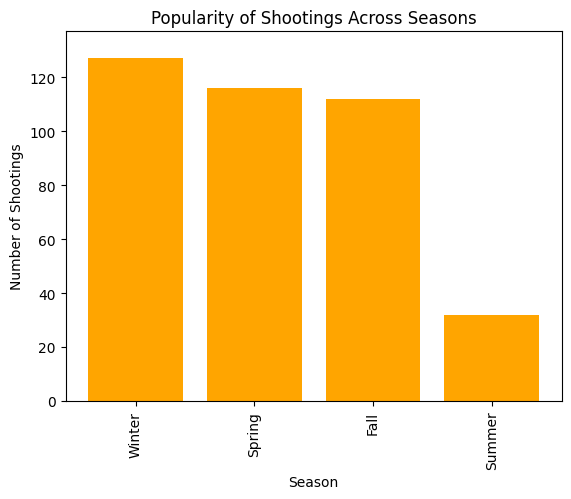

In [12]:
#popularity of shootings over ALL seasons || showing the popularity of shootings across all seasons
number_counts = shootings_df['Season'].value_counts()

plt.bar(number_counts.index, number_counts.values, color='orange', align='center')
plt.xlabel('Season')
plt.xticks(rotation=90)
plt.ylabel('Number of Shootings')
plt.ylim(0, max(number_counts.values) + 10)
plt.title('Popularity of Shootings Across Seasons')
plt.show()


In [13]:
shootings_by_year = shootings_df['year'].value_counts().sort_index()
print(shootings_by_year)

year
1999     7
2000    12
2001    13
2002     5
2003    12
2004     9
2005    13
2006    15
2007    10
2008     9
2009     9
2010     9
2011     7
2012    11
2013    13
2014    16
2015     7
2016    13
2017    15
2018    30
2019    27
2020     9
2021    42
2022    46
2023    28
Name: count, dtype: int64


In [14]:
season_year_counts = shootings_df.groupby(['Season', 'year']).size().reset_index(name='counts')
print(season_year_counts)

    Season  year  counts
0     Fall  1999       3
1     Fall  2000       2
2     Fall  2001       3
3     Fall  2002       3
4     Fall  2003       6
..     ...   ...     ...
85  Winter  2019      10
86  Winter  2020       5
87  Winter  2021       5
88  Winter  2022      12
89  Winter  2023      13

[90 rows x 3 columns]


In [15]:
fall_df = shootings_df[shootings_df['Season'] == 'Fall']
spring_df = shootings_df[shootings_df['Season'] == 'Spring']
summer_df = shootings_df[shootings_df['Season'] == 'Summer']
winter_df = shootings_df[shootings_df['Season'] == 'Winter']

In [16]:
fall_counts = fall_df['year'].value_counts().sort_index()
spring_counts = spring_df['year'].value_counts().sort_index()
summer_counts = summer_df['year'].value_counts().sort_index()
winter_counts = winter_df['year'].value_counts().sort_index()

Colors sorted by popularity seperately

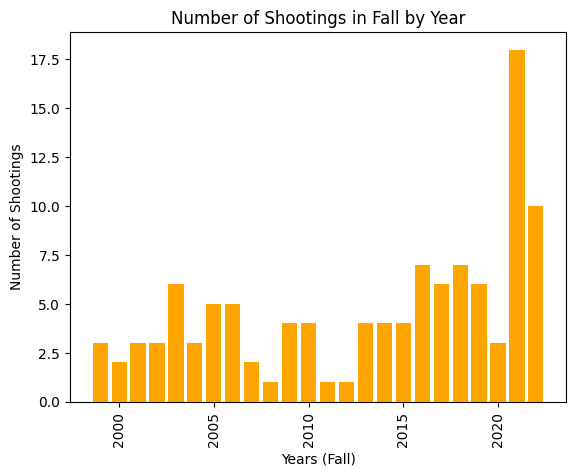

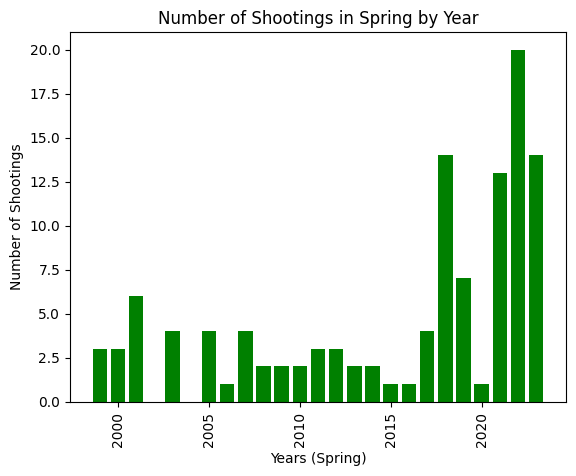

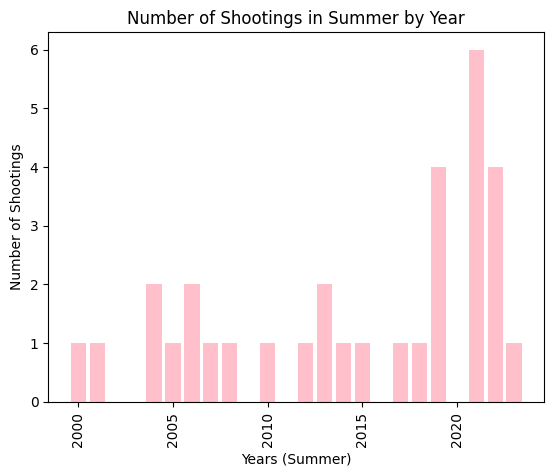

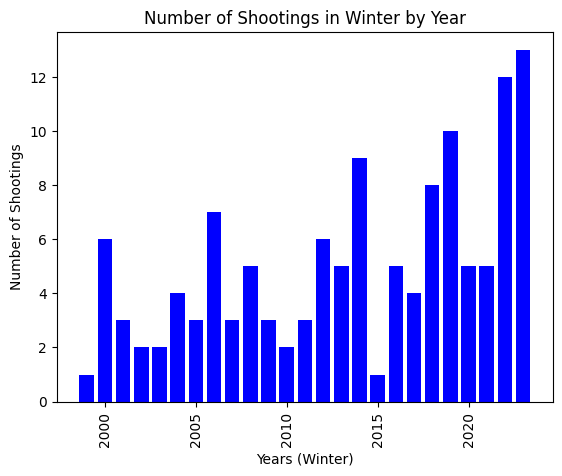

In [17]:
# Adjusting the plotting code based on shootings data (replacing 'colors' with shooting counts per season)

# Sorting the values for each season
fall_counts = fall_counts.sort_index()
spring_counts = spring_counts.sort_index()
summer_counts = summer_counts.sort_index()
winter_counts = winter_counts.sort_index()

# Plot for Fall season
plt.bar(fall_counts.index, fall_counts.values, color='orange', align='center')
plt.xlabel('Years (Fall)')
plt.xticks(rotation=90)
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Fall by Year')
plt.show()

# Plot for Spring season
plt.bar(spring_counts.index, spring_counts.values, color='green', align='center')
plt.xlabel('Years (Spring)')
plt.xticks(rotation=90)
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Spring by Year')
plt.show()

# Plot for Summer season
plt.bar(summer_counts.index, summer_counts.values, color='pink', align='center')
plt.xlabel('Years (Summer)')
plt.xticks(rotation=90)
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Summer by Year')
plt.show()

# Plot for Winter season
plt.bar(winter_counts.index, winter_counts.values, color='blue', align='center')
plt.xlabel('Years (Winter)')
plt.xticks(rotation=90)
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings in Winter by Year')
plt.show()

### Colors by popularity subplot

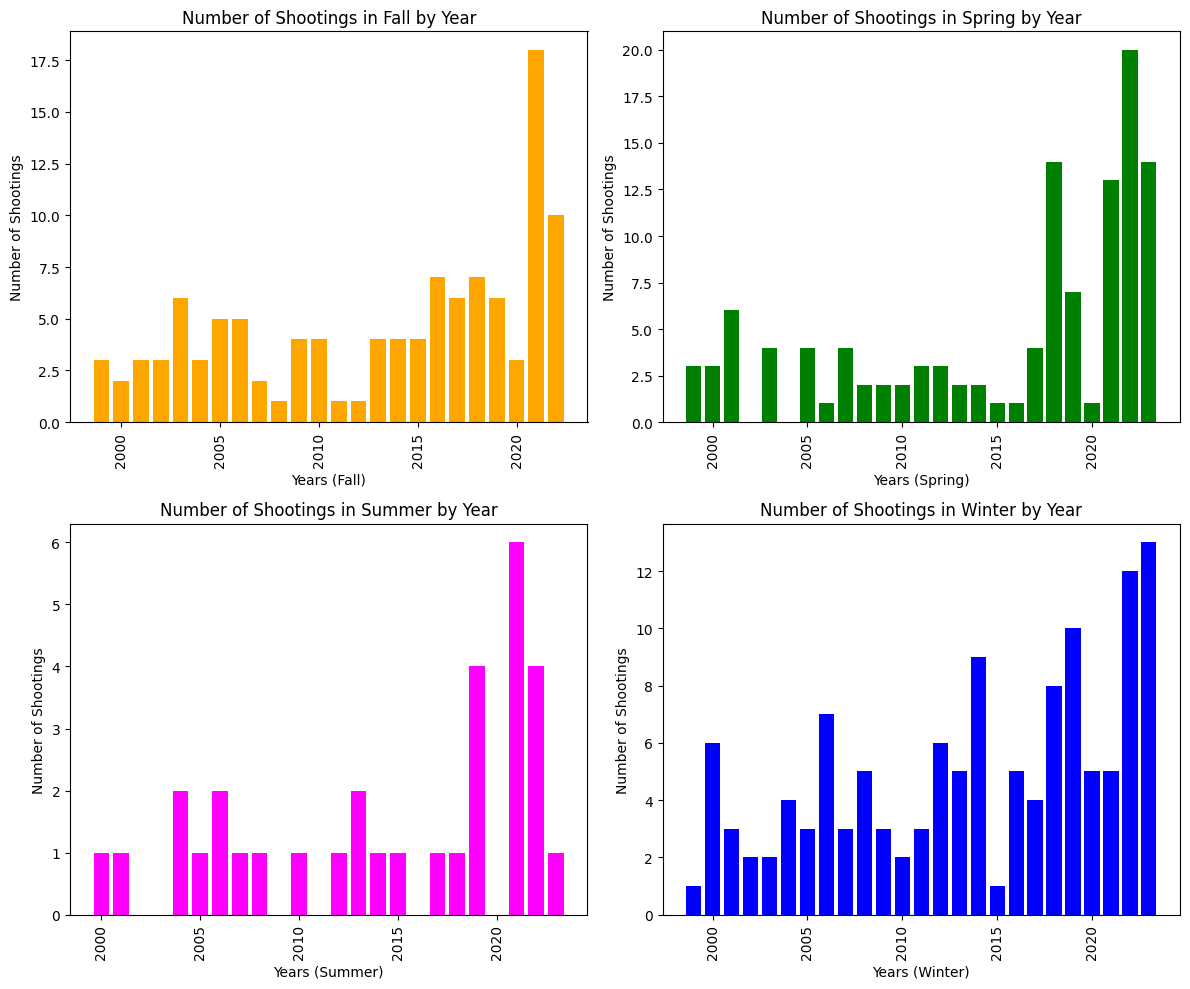

In [18]:
# Adjusting the grid of subplots to work with the shootings data instead of color data
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots for each season's shootings
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_counts.index, fall_counts.values, color='orange')
axs[0, 0].set_title('Number of Shootings in Fall by Year')
axs[0, 0].set_xlabel('Years (Fall)')
axs[0, 0].set_ylabel('Number of Shootings')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_counts.index, spring_counts.values, color='green')
axs[0, 1].set_title('Number of Shootings in Spring by Year')
axs[0, 1].set_xlabel('Years (Spring)')
axs[0, 1].set_ylabel('Number of Shootings')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_counts.index, summer_counts.values, color='magenta')
axs[1, 0].set_title('Number of Shootings in Summer by Year')
axs[1, 0].set_xlabel('Years (Summer)')
axs[1, 0].set_ylabel('Number of Shootings')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_counts.index, winter_counts.values, color='blue')
axs[1, 1].set_title('Number of Shootings in Winter by Year')
axs[1, 1].set_xlabel('Years (Winter)')
axs[1, 1].set_ylabel('Number of Shootings')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Shootings by alphabetical order

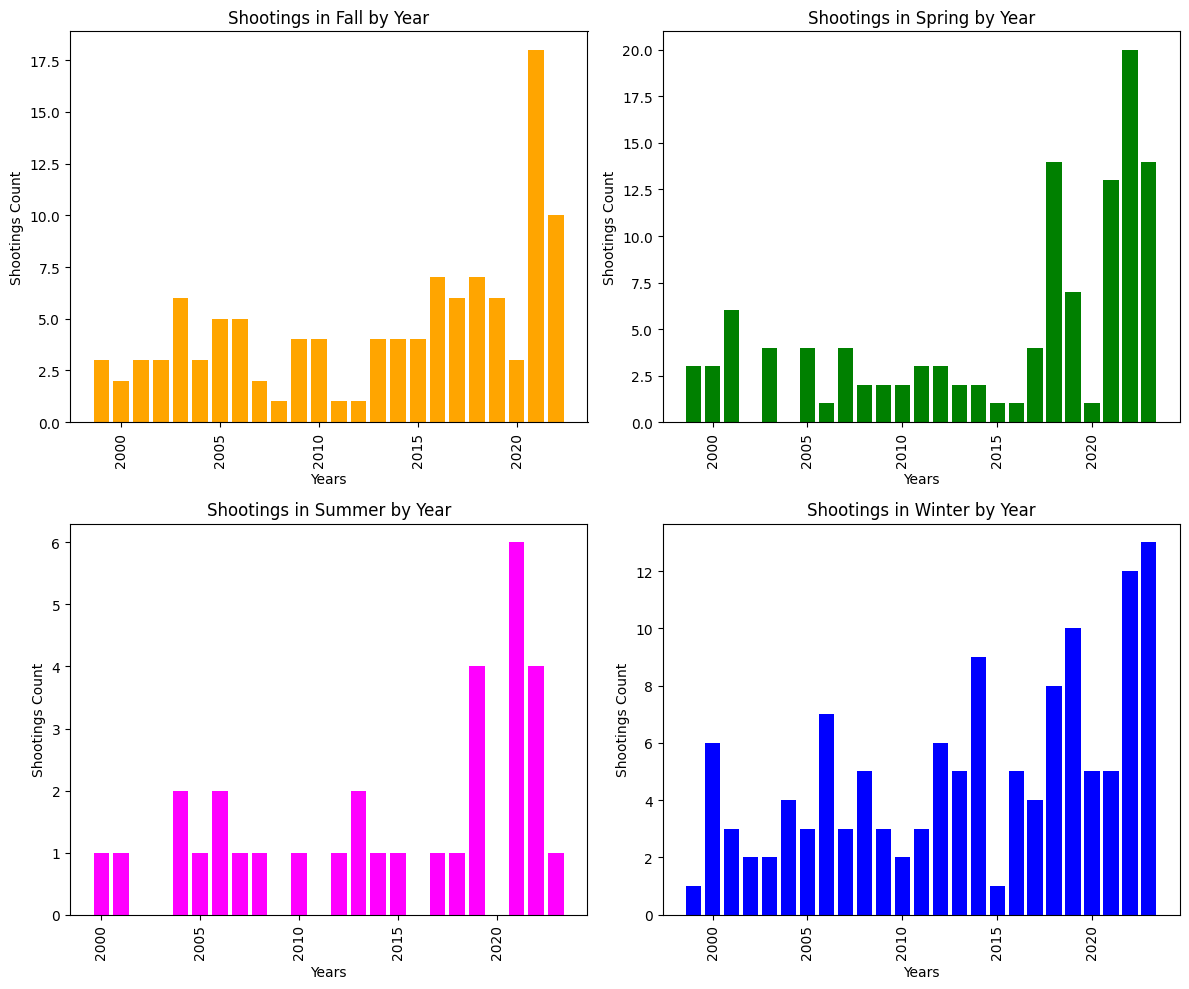

In [19]:
import matplotlib.pyplot as plt

# Assuming fall_counts, spring_counts, summer_counts, and winter_counts are Series with shooting counts

# Sort each Series alphabetically by index (years)
fall_counts = fall_counts.sort_index()
spring_counts = spring_counts.sort_index()
summer_counts = summer_counts.sort_index()
winter_counts = winter_counts.sort_index()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_counts.index, fall_counts.values, color='orange')
axs[0, 0].set_title('Shootings in Fall by Year')
axs[0, 0].set_xlabel('Years')
axs[0, 0].set_ylabel('Shootings Count')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_counts.index, spring_counts.values, color='green')
axs[0, 1].set_title('Shootings in Spring by Year')
axs[0, 1].set_xlabel('Years')
axs[0, 1].set_ylabel('Shootings Count')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_counts.index, summer_counts.values, color='magenta')
axs[1, 0].set_title('Shootings in Summer by Year')
axs[1, 0].set_xlabel('Years')
axs[1, 0].set_ylabel('Shootings Count')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_counts.index, winter_counts.values, color='blue')
axs[1, 1].set_title('Shootings in Winter by Year')
axs[1, 1].set_xlabel('Years')
axs[1, 1].set_ylabel('Shootings Count')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## New way of seeing the data

In [22]:
# Group by year and weapon type from the actual shootings_df
weapon_counts_df_actual = shootings_df.groupby(['year', 'weapon']).size().unstack(fill_value=0)

weapon_counts_df_actual

weapon,".22 caliber gun, .45 caliber gun",.22 caliber handgun,.22 caliber pistol,.22 caliber revolver,".22 caliber rifle, 357-caliber Magnum handgun",.22-caliber Colt revolver,.22-caliber Daisy rifle,.22-caliber Magnum handgun,.22-caliber Ruger pistol,.22-caliber handgun,...,service weapon,shotgun,single-shot shotgun,small revolver,small semi-automatic handgun,small-caliber handgun,small-caliber pistol,small-caliber semiautomatic handgun,"small-caliber, semiautomatic pistol",sniper rifle
year,,,,,,,,,,,,,,,,,,,,,
1999,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2004,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2007,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


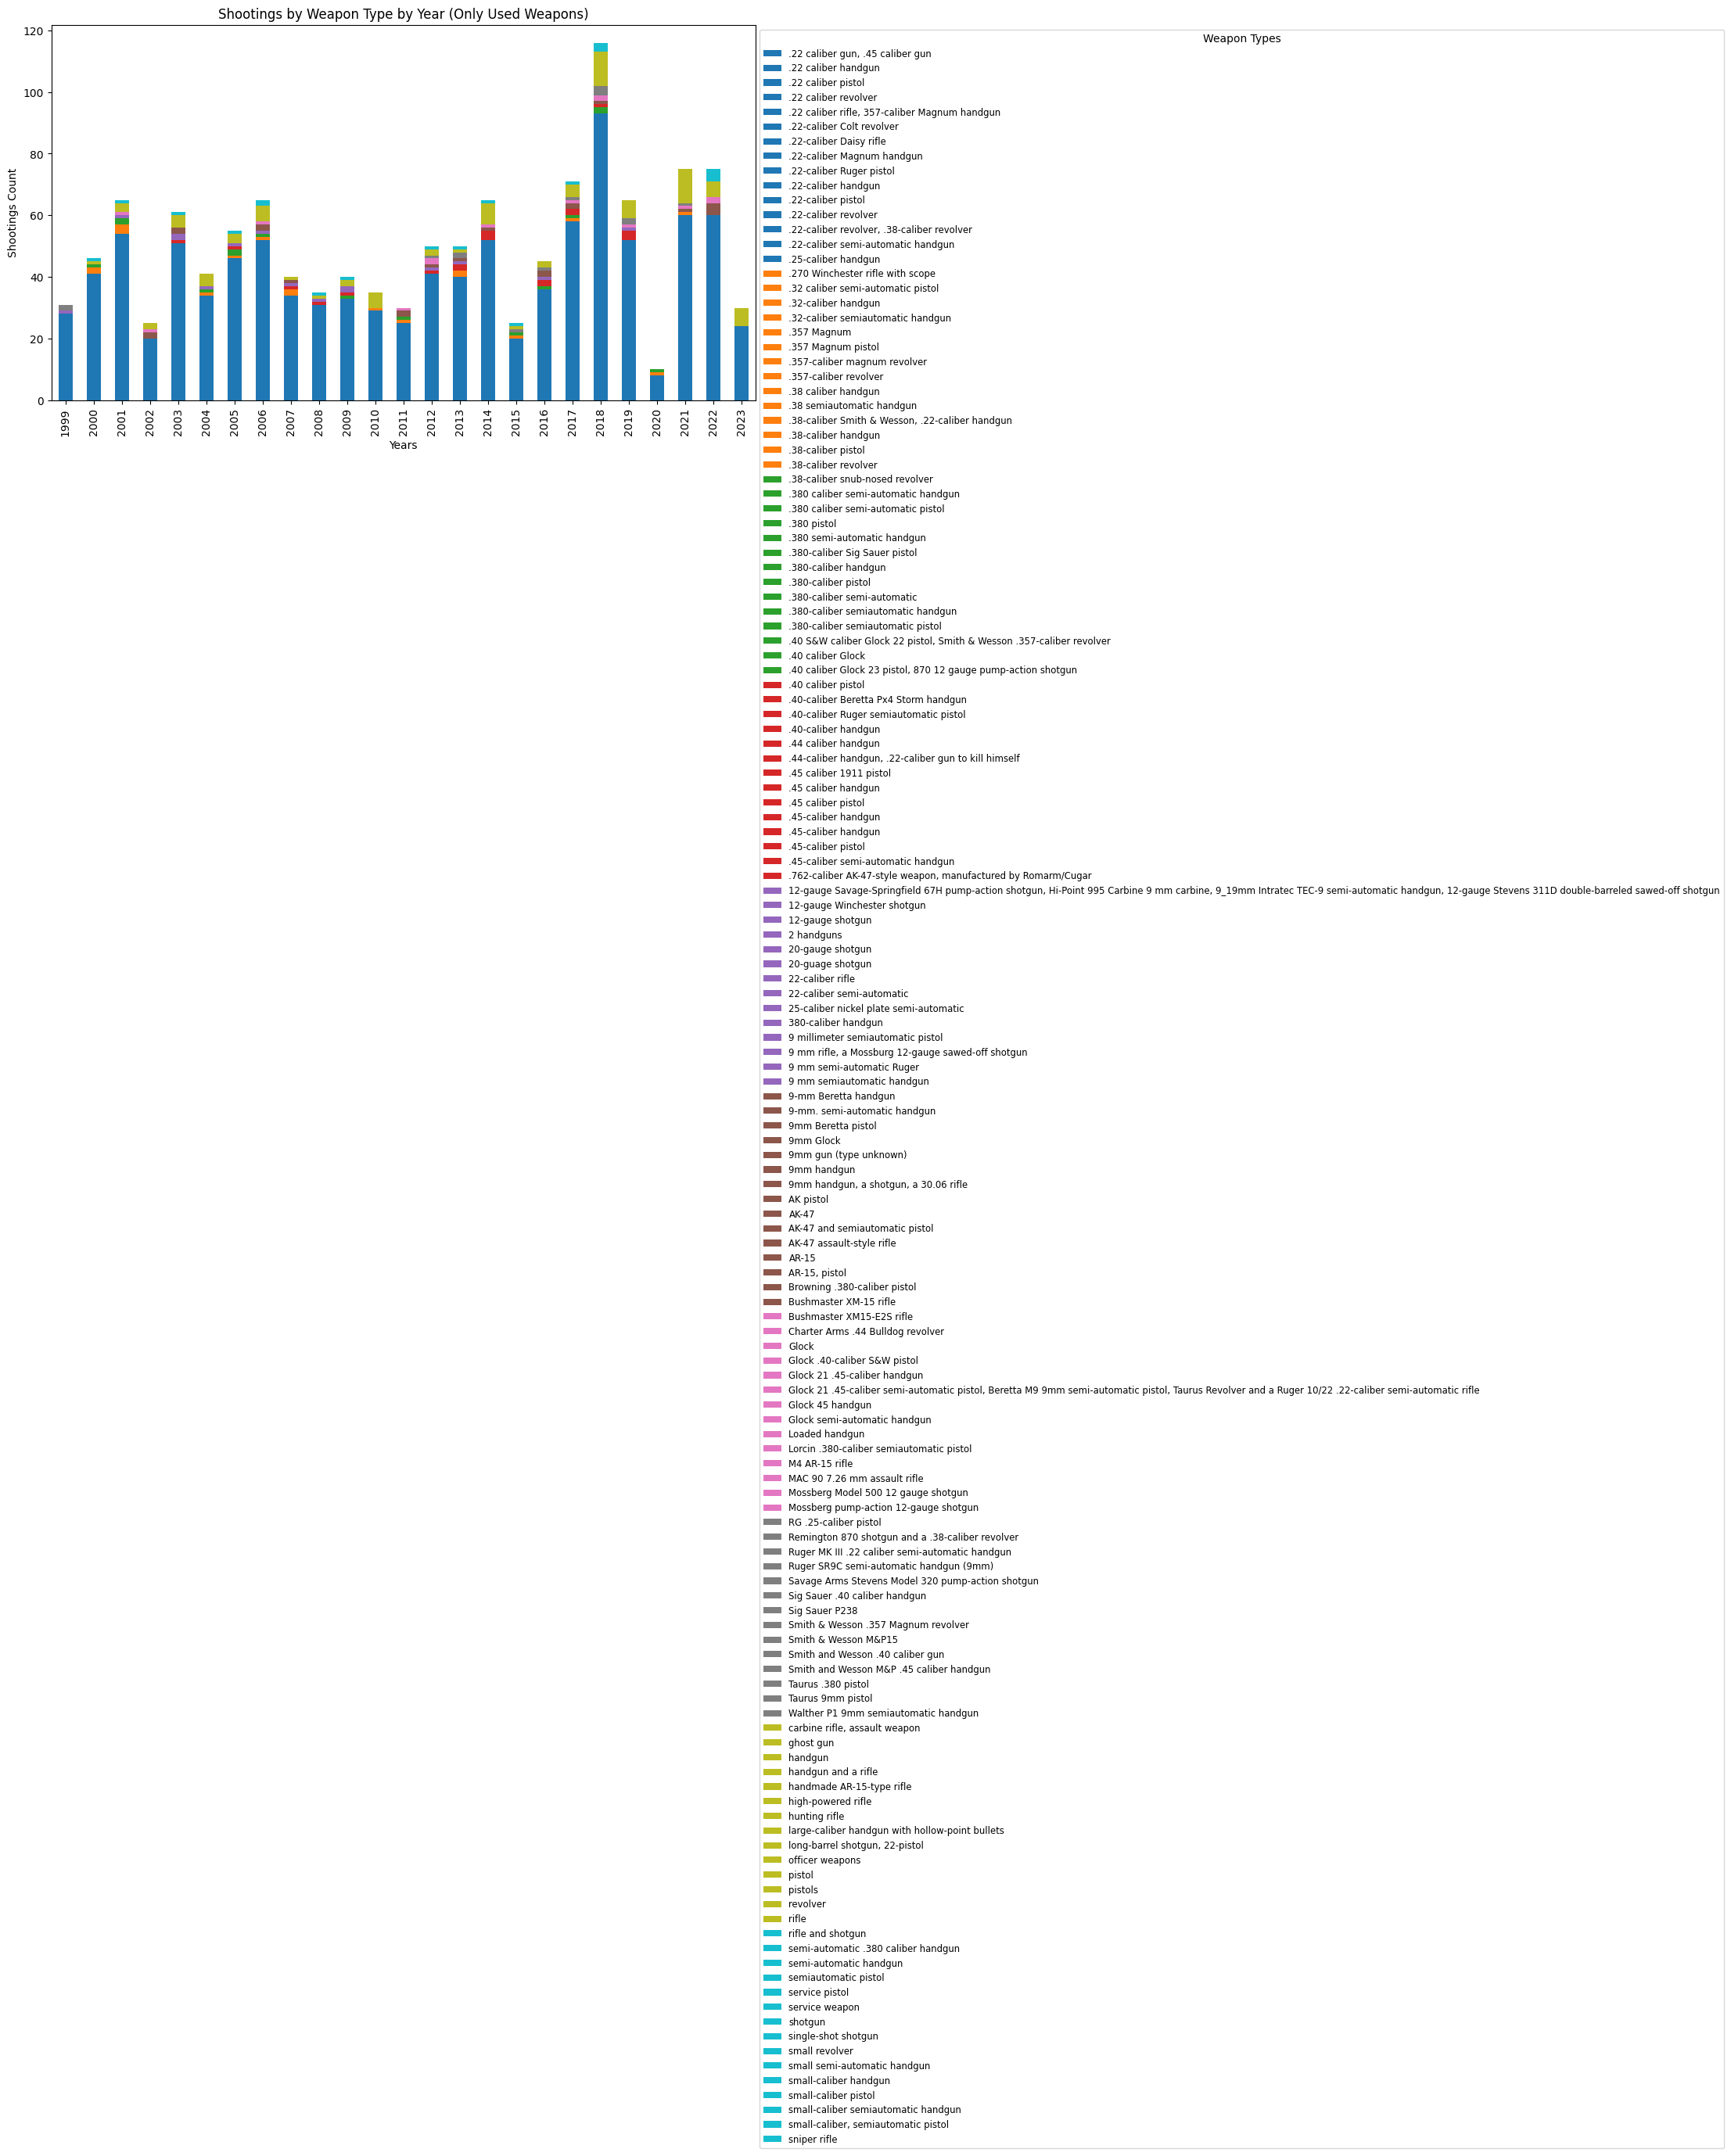

In [39]:
# Create a bar graph showing only the guns that were used
ax = cleaned_weapon_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')

# Set title and labels
plt.title('Shootings by Weapon Type by Year (Only Used Weapons)')
plt.xlabel('Years')
plt.ylabel('Shootings Count')
plt.xticks(rotation=90)

# Filter the legend to only show weapons that were used (i.e., columns that aren't all zeros)
used_weapons = cleaned_weapon_counts_df.columns
plt.legend(title="Weapon Types", labels=used_weapons, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Manually adjust the layout to avoid overlapping decorations
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.3)

# Show the plot
plt.show()

